In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

car_price_df = pd.read_csv("https://raw.githubusercontent.com/YBI-Foundation/Dataset/refs/heads/main/Car%20Price.csv");

### Проверка и подготовка данных к обучению

In [2]:
car_price_df.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [3]:
car_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [4]:
car_price_df["Model"].value_counts()

Model
Maruti Swift Dzire VDI                      69
Maruti Alto 800 LXI                         59
Maruti Alto LXi                             47
Maruti Alto LX                              35
Hyundai EON Era Plus                        35
                                            ..
Honda Jazz Select Edition                    1
Maruti Swift Dzire AMT VXI                   1
Hyundai Creta 1.6 SX Automatic               1
Mercedes-Benz E-Class 280 CDI Elegance       1
Audi RS7 2015-2019 Sportback Performance     1
Name: count, Length: 1491, dtype: int64

In [5]:
car_price_df["Brand"].value_counts()

Brand
Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Mitsubishi          6
Jaguar              6
Land                5
Volvo               4
Ambassador          4
Jeep                3
OpelCorsa           2
MG                  2
Force               1
Daewoo              1
Isuzu               1
Kia                 1
Name: count, dtype: int64

In [6]:
car_price_df["Owner"].value_counts()

Owner
First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: count, dtype: int64

В данных есть 3 колонки имеющие числовой тип:
* Год (`Year`).
* Цена продажи (`Selling_Price`).
* Пробег автомобиля (`KM_Driven`).

Остальные переменные категориальные:
* Бренд (`Brand`).
* Модель (`Model`).
* Топливо (`Fuel`).
* Тип продавца (`Seller`).
* Трансмиссия (`Transmission`)
* Количество владельцев (`Owner`).

Переменная `Model` имеет слишком много значений (высокая кардинальность), наверное ее стоит исключить т. к будет создан шум. `Owner` кажется категориальной, ранговой переменной и возможно нужно преобразование сохраняющее порядок, но также можно предположить что на самом деле порядка нет и цена не зависит от количества владелцев авто.

Нужно отметить что в датасете нет пропусков.

### Выберите вещественную переменную в качестве таргета

В качестве target переменной будет выбрана - `Selling Price`.

### Выберите несколько объясняющих переменных

В качестве объясняющих переменных будет выбраны следующие:
* `Year`
* `KM_Driven`
* `Brand`
* `Fuel`
* `Seller`
* `Transmission`
* `Owner`

In [7]:
car_price_df = car_price_df.drop(columns=("Model"))
car_price_df.head()

,Brand,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


### Постройте точечные диаграммы (scatterplots) для таргета и каждой фичи

Точечные диаграммы будут построены только для числовых переменных

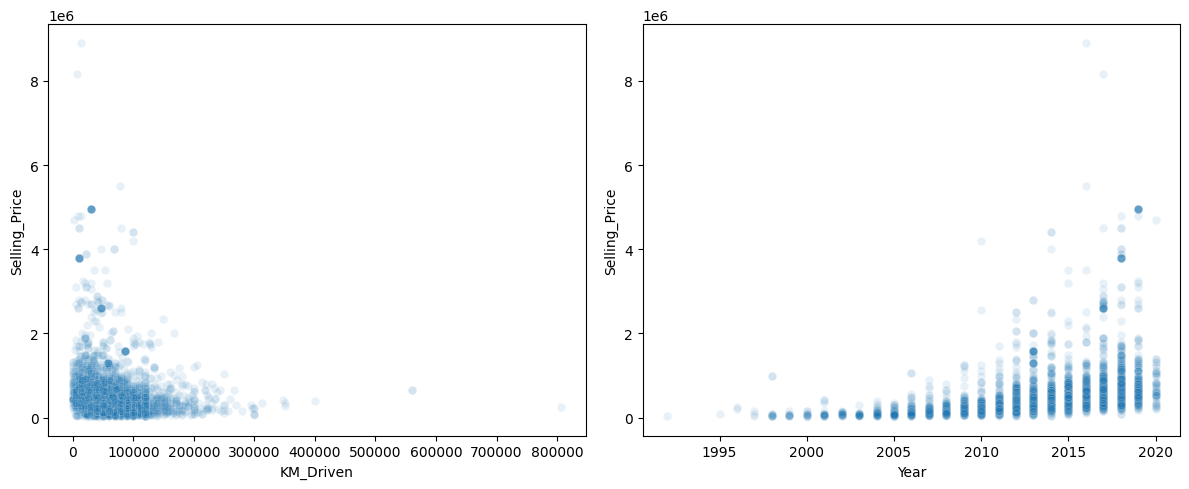

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.scatterplot(car_price_df, y="Selling_Price", x="KM_Driven", ax=axes[0], alpha=0.1)
sns.scatterplot(car_price_df, y="Selling_Price", x="Year", ax=axes[1], alpha=0.1)

plt.tight_layout()
plt.show()

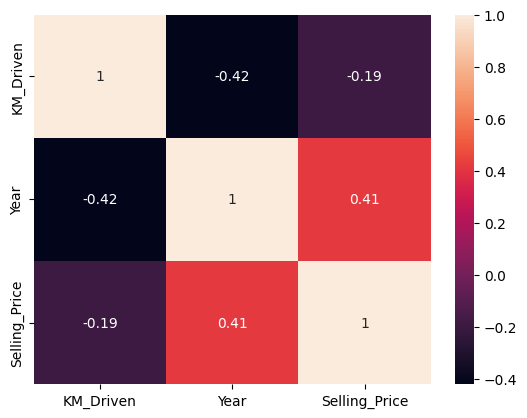

In [9]:
sns.heatmap(car_price_df[["KM_Driven", "Year", "Selling_Price"]].corr(), annot=True)
plt.show()

### Опишите форму взаимосвязи между переменными

Форма взаимосвязи между переменными `Selling Price` и:
* `KM_Driven` имеет форму больше напоминающую логарифмическую зависимость. Видно: некоторые выбросы количество которых увеличивается с уменьшением пробега, слабую отрицательную корреляцию, данные в основном сконцентрированы об автомобилях с небольшим пробегом, причем цена очень сильно варьируется.
* `Year` напоминает экспоненциальную зависимость. Видно: выбросы количество которых также увеличивается с уменьшением возраста авто, положительную корреляцию, довольно таки сильный размах в ценах.

### Разделите датасет на обучающую и тестовую выборки


In [10]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_target, test_target = train_test_split(
    car_price_df.drop("Selling_Price", axis=1),
    car_price_df["Selling_Price"],
    test_size=0.3,
    random_state=42,
)


### Обучите модель линейной регрессии на разных наборах переменных и для разных спецификаций модели на обучающей выборке сделайте предсказания целевой переменной для тестовой выборки и рассчитайте метрики качества.

In [11]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3038 entries, 929 to 860
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         3038 non-null   object
 1   Year          3038 non-null   int64 
 2   KM_Driven     3038 non-null   int64 
 3   Fuel          3038 non-null   object
 4   Seller_Type   3038 non-null   object
 5   Transmission  3038 non-null   object
 6   Owner         3038 non-null   object
dtypes: int64(2), object(5)
memory usage: 189.9+ KB


In [12]:
test_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 3978 to 1702
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         1302 non-null   object
 1   Year          1302 non-null   int64 
 2   KM_Driven     1302 non-null   int64 
 3   Fuel          1302 non-null   object
 4   Seller_Type   1302 non-null   object
 5   Transmission  1302 non-null   object
 6   Owner         1302 non-null   object
dtypes: int64(2), object(5)
memory usage: 81.4+ KB


In [13]:
import numpy as np
from sklearn.metrics import (
    mean_absolute_error,
    mean_absolute_percentage_error,
    mean_squared_error,
    r2_score,
    root_mean_squared_error,
)

ArrayLike = np.ndarray | list


def regression_report(y_true: ArrayLike, y_pred: ArrayLike) -> None:
    """Функция для удобного вывода основных метрик регрессии."""
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"{'MAE':<10}: {mae:.3f}")
    print(f"{'MAPE':<10}: {mape:.3f}")
    print(f"{'MSE':<10}: {mse:.3f}")
    print(f"{'RMSE':<10}: {rmse:.3f}")
    print(f"{'R²':<10}: {r2:.3f}")

Спецификация 1. Все ранее выбранные наборы переменных используются для обучения и все подверглись нормализации StandardScaler для числовых и OneHotEncoder для категориальных.

In [14]:
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

regressor = TransformedTargetRegressor(regressor=LinearRegression(), transformer=StandardScaler())

# Нормализация данных
preprocessor = ColumnTransformer(
    transformers=(
        ("number", StandardScaler(), ["Year", "KM_Driven"]),
        (
            "categorical_not_rank",
            OneHotEncoder(handle_unknown="infrequent_if_exist"),
            ["Brand", "Fuel", "Seller_Type", "Transmission", "Owner"],
        ),
    ),
)

model1 = Pipeline([("preprocessing", preprocessor), ("regressor", regressor)])

model1.fit(train_features, train_target)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=(('number', StandardScaler(),
                                                  ['Year', 'KM_Driven']),
                                                 ('categorical_not_rank',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  ['Brand', 'Fuel',
                                                   'Seller_Type',
                                                   'Transmission',
                                                   'Owner'])))),
                ('regressor',
                 TransformedTargetRegressor(regressor=LinearRegression(),
                                            transformer=StandardScaler()))])

In [15]:
model1_predicted = model1.predict(test_features)

In [16]:
regression_report(test_target, model1_predicted)

MAE       : 182683.259
MAPE      : 0.553
MSE       : 124761257814.026
RMSE      : 353215.597
R²        : 0.578


In [17]:
# Можно взглянуть на подобранные коэффициенты
pd.DataFrame(
    data=[model1.named_steps["regressor"].regressor_.coef_],
    columns=model1.named_steps["preprocessing"].get_feature_names_out(),
).T

,0
number__Year,0.265794
number__KM_Driven,-0.082461
categorical_not_rank__Brand_Ambassador,-0.863487
categorical_not_rank__Brand_Audi,0.836512
categorical_not_rank__Brand_BMW,2.829833
categorical_not_rank__Brand_Chevrolet,-1.155645
categorical_not_rank__Brand_Datsun,-1.232022
categorical_not_rank__Brand_Fiat,-1.128892
categorical_not_rank__Brand_Force,-1.307006
categorical_not_rank__Brand_Ford,-0.842641


Спецификация 2. Все ранее выбранные наборы переменных используются для обучения и все подверглись нормализации `StandardScaler` для числовых и `OneHotEncoder` для категориальных, кроме `Owner` - она закодирована `OrdinalEncoder`.

Вывести все значения колонки Owner чтобы построить Ranked переменную

In [18]:
train_features["Owner"].unique()

array(['First Owner', 'Second Owner', 'Third Owner', 'Test Drive Car',
       'Fourth & Above Owner'], dtype=object)

In [19]:
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

regressor = TransformedTargetRegressor(regressor=LinearRegression(), transformer=StandardScaler())

# Нормализация данных
preprocessor = ColumnTransformer(
    transformers=(
        ("number", StandardScaler(), ["Year", "KM_Driven"]),
        (
            "categorical_not_rank",
            OneHotEncoder(handle_unknown="infrequent_if_exist"),
            ["Brand", "Fuel", "Seller_Type", "Transmission"],
        ),
        (
            "categorical_ranked",
            OrdinalEncoder(
                categories=[["Test Drive Car", "First Owner", "Second Owner", "Third Owner", "Fourth & Above Owner"]],
            ),
            ["Owner"],
        ),
    ),
)

model2 = Pipeline([("preprocessing", preprocessor), ("regressor", regressor)])

model2.fit(train_features, train_target)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=(('number', StandardScaler(),
                                                  ['Year', 'KM_Driven']),
                                                 ('categorical_not_rank',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  ['Brand', 'Fuel',
                                                   'Seller_Type',
                                                   'Transmission']),
                                                 ('categorical_ranked',
                                                  OrdinalEncoder(categories=[['Test '
                                                                              'Drive '
                                                                              'Car',
                                                                              'First '
                                                                              'Owner',
                                                                              'Second '
                                                                              'Owner',
                                                                              'Third '
                                                                              'Owner',
                                                                              'Fourth '
                                                                              '& '
                                                                              'Above '
                                                                              'Owner']]),
                                                  ['Owner'])))),
                ('regressor',
                 TransformedTargetRegressor(regressor=LinearRegression(),
                                            transformer=StandardScaler()))])

In [20]:
model2_predicted = model2.predict(test_features)

In [21]:
regression_report(test_target, model2_predicted)

MAE       : 183094.067
MAPE      : 0.558
MSE       : 125103799907.076
RMSE      : 353700.155
R²        : 0.577


In [22]:
pd.DataFrame(
    data=[model2.named_steps["regressor"].regressor_.coef_],
    columns=model2.named_steps["preprocessing"].get_feature_names_out(),
).T

,0
number__Year,0.268224
number__KM_Driven,-0.083797
categorical_not_rank__Brand_Ambassador,-0.839931
categorical_not_rank__Brand_Audi,0.836751
categorical_not_rank__Brand_BMW,2.830170
categorical_not_rank__Brand_Chevrolet,-1.155670
categorical_not_rank__Brand_Datsun,-1.239134
categorical_not_rank__Brand_Fiat,-1.133721
categorical_not_rank__Brand_Force,-1.302055
categorical_not_rank__Brand_Ford,-0.831746


Наблюдается небольшое ухудшение скорее всего из-за не линейной взаимосвязи между переменной `Owner` и `Selling_Price`

Спецификация 3. Все ранее выбранные наборы переменных используются для обучения и все подверглись нормализации `StandardScaler` для числовых и `OrdinalEncoder` для категориальных.

In [23]:
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler

regressor = TransformedTargetRegressor(regressor=LinearRegression(), transformer=StandardScaler())

# Нормализация данных
preprocessor = ColumnTransformer(
    transformers=(
        ("number", StandardScaler(), ["Year", "KM_Driven"]),
        (
            "categorical_ranked",
            OrdinalEncoder(
                categories=[["First Owner", "Second Owner", "Third Owner", "Test Drive Car", "Fourth & Above Owner"]],
            ),
            ["Owner"],
        ),
        (
            "categorical",
            OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=-1),
            ["Brand", "Fuel", "Seller_Type", "Transmission"],
        ),
    ),
)

model3 = Pipeline([("preprocessing", preprocessor), ("regressor", regressor)])

model3.fit(train_features, train_target)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=(('number', StandardScaler(),
                                                  ['Year', 'KM_Driven']),
                                                 ('categorical_ranked',
                                                  OrdinalEncoder(categories=[['First '
                                                                              'Owner',
                                                                              'Second '
                                                                              'Owner',
                                                                              'Third '
                                                                              'Owner',
                                                                              'Test '
                                                                              'Drive '
                                                                              'Car',
                                                                              'Fourth '
                                                                              '& '
                                                                              'Above '
                                                                              'Owner']]),
                                                  ['Owner']),
                                                 ('categorical',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Brand', 'Fuel',
                                                   'Seller_Type',
                                                   'Transmission'])))),
                ('regressor',
                 TransformedTargetRegressor(regressor=LinearRegression(),
                                            transformer=StandardScaler()))])

In [24]:
model3_predicted = model3.predict(test_features)

In [25]:
regression_report(test_target, model3_predicted)

MAE       : 221993.657
MAPE      : 0.717
MSE       : 165647899011.958
RMSE      : 406998.647
R²        : 0.440


Наблюдается ухудшение показателей при неправильном кодировании категориальных переменных

Спецификация 4. Используется самая лучшая спецификация (Спецификация 1) и выбрасывается фича - `KM_Driven`.

In [26]:
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

regressor = TransformedTargetRegressor(regressor=LinearRegression(), transformer=StandardScaler())

# Нормализация данных
preprocessor = ColumnTransformer(
    transformers=(
        ("number", StandardScaler(), ["Year"]),
        (
            "categorical_not_rank",
            OneHotEncoder(handle_unknown="infrequent_if_exist"),
            ["Brand", "Fuel", "Seller_Type", "Transmission", "Owner"],
        ),
    ),
)

model4 = Pipeline([("preprocessing", preprocessor), ("regressor", regressor)])

model4.fit(train_features.drop("KM_Driven", axis=1), train_target)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=(('number', StandardScaler(),
                                                  ['Year']),
                                                 ('categorical_not_rank',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  ['Brand', 'Fuel',
                                                   'Seller_Type',
                                                   'Transmission',
                                                   'Owner'])))),
                ('regressor',
                 TransformedTargetRegressor(regressor=LinearRegression(),
                                            transformer=StandardScaler()))])

In [27]:
model4_predicted = model4.predict(test_features.drop("KM_Driven", axis=1))

In [28]:
regression_report(test_target, model4_predicted)

MAE       : 183002.182
MAPE      : 0.542
MSE       : 125865855250.730
RMSE      : 354775.782
R²        : 0.574


Наблюдается небольшое ухудшение модели если не учитывать пробег

Спецификация 5. Попытка учесть что `KM_Driven` и `Year` нелинейно связаны с `Selling_Price`

In [29]:
import numpy as np
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler

regressor = TransformedTargetRegressor(regressor=LinearRegression(), transformer=StandardScaler())

log_transformer = FunctionTransformer(np.log1p, feature_names_out="one-to-one")
x2_transformer = FunctionTransformer(lambda x: x**2, feature_names_out="one-to-one")
log_normal_transformer = make_pipeline(x2_transformer, StandardScaler())
x2_normal_transformer = make_pipeline(log_transformer, StandardScaler())

# Нормализация данных
preprocessor = ColumnTransformer(
    transformers=(
        ("log_km", x2_normal_transformer, ["KM_Driven"]),
        ("scaled_year", log_normal_transformer, ["Year"]),
        (
            "categorical_not_rank",
            OneHotEncoder(handle_unknown="infrequent_if_exist"),
            ["Brand", "Fuel", "Seller_Type", "Transmission", "Owner"],
        ),
    ),
)

model5 = Pipeline([("preprocessing", preprocessor), ("regressor", regressor)])

model5.fit(train_features, train_target)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=(('log_km',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<ufunc 'log1p'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['KM_Driven']),
                                                 ('scaled_year',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(feature_names_out='one-to-one',
                                                                                       func=<function <lambda> at 0x00000232B9955E40>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['Year']),
                                                 ('categorical_not_rank',
                                                  OneHotEncoder(handle_unknown='infrequent_if_exist'),
                                                  ['Brand', 'Fuel',
                                                   'Seller_Type',
                                                   'Transmission',
                                                   'Owner'])))),
                ('regressor',
                 TransformedTargetRegressor(regressor=LinearRegression(),
                                            transformer=StandardScaler()))])

In [30]:
model5_predicted = model5.predict(test_features)

In [31]:
regression_report(test_target, model5_predicted)

MAE       : 182610.113
MAPE      : 0.548
MSE       : 124047565787.898
RMSE      : 352203.870
R²        : 0.580


Все показатели немного улучшились после преобразования объясняющих переменных.

### Выберите спецификацию модели с наилучшим качеством. Сделайте выводы относительно полученной модели и ее качества.

Спецификация №5 получила самые лучшие метрики.

MAPE - показывает что ошибка составляет 54.8% от реальных данных что весьма много. RMSE и MAE весьма сильно различаются из-за того что в данных имеются не только выбросы, но и большой размах в данных. Показатель R^2 находится на уровне 58% - это означает то, что модель объясняет 58% отклонения от среднего (дисперсии) и соответственно на 58% лучше, чем просто использование среднего значения. В целом модель получилась не очень хорошей, не подходит для реальных задач. 

### Дайте содержательную интерпретацию полученным зависимостям

In [33]:
# Выводит коэффициенты и названия объясняющих переменных

pd.DataFrame(
    data=[model5.named_steps["regressor"].regressor_.coef_],
    columns=model5.named_steps["preprocessing"].get_feature_names_out(),
).T

,0
log_km__KM_Driven,-0.092316
scaled_year__Year,0.257386
categorical_not_rank__Brand_Ambassador,-0.855909
categorical_not_rank__Brand_Audi,0.851709
categorical_not_rank__Brand_BMW,2.840176
categorical_not_rank__Brand_Chevrolet,-1.142106
categorical_not_rank__Brand_Datsun,-1.243992
categorical_not_rank__Brand_Fiat,-1.132533
categorical_not_rank__Brand_Force,-1.287505
categorical_not_rank__Brand_Ford,-0.848354


В таблице выше выведено влияние каждой переменной на модель. Из за большого количества категориальных переменных это весьма большой список, поэтому по категориальным переменным, будет дана общая интерпретация.


* `Year` - из двух числовых переменных является наиболее удачной данная переменная имеет положительную корреляцию (чем больше год - тем выше цена продажи) и объясняет больше чем переменная пробег (`KM_Driven`)
* `KM_Driven` - имеет отрицательную корреляцию, чем выше пробег тем дешевле стоимость авто.
* `Brand`, каждый производитель имеет свой коэффициент, можно рассмотреть какой брэнд является наиболее дорогим или дешевым.
* `Fuel` - Тип топлива, самые дешевые авто электрические, а самые дорогие дизельные. Авто на сжиженном природном газу (CNG) чуть дешевле чем бензиновые.
* `Seller_Type` - Дешевле всего покупать автомобили сразу у владельца (`Individual`), дороже всего у сертифицированных дилер `Trustmark Dealer`.
* `Transmission` - автоматическая трансмиссия дороже чем ручная.
* `Owner` - наиболее дорогие авто после 1 владельца, затем Test Drive авто. Если владельца 2 или 3 это немного влияет на цену авто - оно стоит дешевле. Начиная с 4 владельцев цена авто почти никак не меняется (небольшая положительная корреляция обусловлена другими причинами).